## Temporal Demand Patterns and Seasonality

Step 1: Data preparation
We convert the columns "start_time" and "end_time" to datetime and the generate additional columns for the date, time, hour, month and weekday.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data/philadelphia_2017.csv")

In [4]:
for column in ["start_time", "end_time"]:
    df[column] = pd.to_datetime(df[column])
    df[column+"_date"] = df[column].dt.date
    df[column+"_time"] = df[column].dt.time
    df[column+"_hour"] = df[column].dt.hour
    df[column+"_month"] = df[column].dt.month
    df[column+"_week"] = df[column].dt.isocalendar().week
    df[column+"_weekday"] = df[column].dt.weekday

#### Analysis of Rental during the day

First count the started rentals for each hour of the day for the whole dataset and vizualize it in a histogram.

In [5]:
df.groupby(["start_time_hour"])["start_time_hour"].count().reset_index(name="n_rentals_within_hour")

,start_time_hour,n_rentals_within_hour
0,0,7726
1,1,4962
2,2,3373
3,3,1659
4,4,1752
5,5,7271
6,6,20167
7,7,40404
8,8,66331
9,9,40853


In [6]:
mean = df.groupby(["start_time_hour"])["start_time_hour"].count().mean()
mean

32871.125

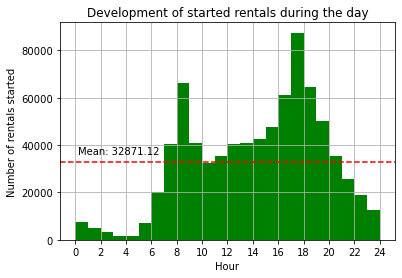

In [7]:
plt.hist(df["start_time_hour"], bins=range(0,25,1), color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Number of rentals started")
plt.title("Development of started rentals during the day")
plt.xticks(range(0,25,2))
plt.grid(True)
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.show()

To get average values we calculate the number of days for which we have data in our dataset and calculate the avarage number of rentals started within each hour in a day.

IMPORTANT: The average values only provide meaningful results if we assume that we have all rental transactions that actually occurred included in our data set.

In [8]:
number_days = len(df["start_time_date"].unique())
number_days

365

In [9]:
df_avg_per_hour = df.groupby(["start_time_hour"])["start_time_hour"].count().divide(number_days).reset_index(name="avg_n_rentals_within_hour")
df_avg_per_hour

,start_time_hour,avg_n_rentals_within_hour
0,0,21.167123
1,1,13.594521
2,2,9.241096
3,3,4.545205
4,4,4.800000
5,5,19.920548
6,6,55.252055
7,7,110.695890
8,8,181.728767
9,9,111.926027


In [10]:
mean= df_avg_per_hour["avg_n_rentals_within_hour"].mean()
mean

90.05787671232876

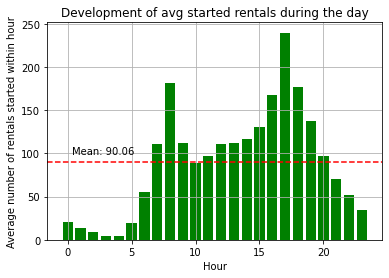

In [11]:
plt.bar(
        df_avg_per_hour["start_time_hour"], 
        df_avg_per_hour["avg_n_rentals_within_hour"], 
        color="green"
)
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Average number of rentals started within hour")
plt.title("Development of avg started rentals during the day")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

In the plots above we only considered the starting times of the rentals. To also considere the endtime, we calculate how many bikes in the respective hours were IN USE accumulated over the year. (e.g. rental from 0 o'clock to 2:45 would count as a usage in hour 0, 1 and 2). In the process of calculation we also have to considere that bikes can be rented out for several days.

In [12]:
df_values = pd.DataFrame()
for i in range(0,24,1):
    df_values[f"{i}"]= (((df["start_time_hour"] <= i) & (df["end_time_hour"] >= i)) 
                        | ((df["end_time_hour"] >= i) & (df["start_time_date"] < df["end_time_date"])))

df_sum = df_values.apply(lambda x: x.sum()/number_days).reset_index(name="avg_n_of_bikes_in_use").rename(columns={"index": "hour"})
df_sum

,hour,avg_n_of_bikes_in_use
0,0,37.969863
1,1,25.605479
2,2,19.534247
3,3,13.673973
4,4,13.200000
5,5,28.863014
6,6,67.904110
7,7,131.383562
8,8,217.268493
9,9,155.221918


In [13]:
mean = df_sum["avg_n_of_bikes_in_use"].mean()
mean

118.83504566210046

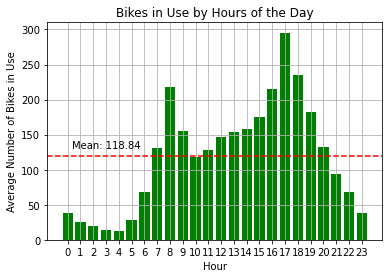

In [14]:
plt.bar(df_sum["hour"], df_sum["avg_n_of_bikes_in_use"], color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Average Number of Bikes in Use")
plt.title("Bikes in Use by Hours of the Day")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

#### Analysis and Interpretation of the Results:

The plots above all show that we have two peaks of bike rentals in the day. One peak demand at 8 am and the other peak at 5 pm. This peak can be a result of the rush-hour traffic. At these times most people are on their way to work/school or on their way back home. The demand around these times ( 8 am and 5 pm ) are also above average. Besides that, it also becomes clear that the bikes are mostly used during the day. During the night the demand is significantly below average (from 9 pm until 6 am).

### Analysis of Rental during the week

First count the started rentals for each weekday of the day for the whole dataset and vizualize it in a histogram.

In [15]:
df.groupby(["start_time_weekday"])["start_time_weekday"].count().reset_index(name="n_rentals_within_weekday")

,start_time_weekday,n_rentals_within_weekday
0,0,112313
1,1,119890
2,2,129499
3,3,124702
4,4,118701
5,5,92786
6,6,91016


The mapping: {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday",5: "Saturday",6: "Sunday"}

In [16]:
mean = df.groupby(["start_time_weekday"])["start_time_weekday"].count().mean()
mean

112701.0

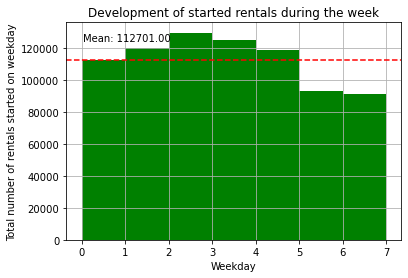

In [17]:
plt.hist(df["start_time_weekday"], bins=range(0,8,1), color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Weekday")
plt.ylabel("Total number of rentals started on weekday")
plt.title("Development of started rentals during the week")
plt.xticks(range(0,8,1))
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

To get average values we calculate the number of weeks for which we have data in our dataset and calculate the avarage number of rentals started within each weekday.

IMPORTANT: The average values only provide meaningful results if we assume that we have all rental transactions that actually occurred included in our data set or at least equally distributed missing data points for each weekday. Otherwise the average values would provide misleading information. If we for example would have missing rental data for a specific weekday for several weeks, dividing by the total number of weeks would result to false average value for this weekday!

In [18]:
number_weeks = len(df["start_time_week"].unique())
number_weeks

52

In [19]:
df_average_per_weekday = df.groupby(["start_time_weekday"])["start_time_weekday"].count().divide(number_weeks).reset_index(name="avg_number_started_rentals")
df_average_per_weekday

,start_time_weekday,avg_number_started_rentals
0,0,2159.865385
1,1,2305.576923
2,2,2490.365385
3,3,2398.115385
4,4,2282.711538
5,5,1784.346154
6,6,1750.307692


In [20]:
mean = df_average_per_weekday["avg_number_started_rentals"].mean()
mean

2167.3269230769233

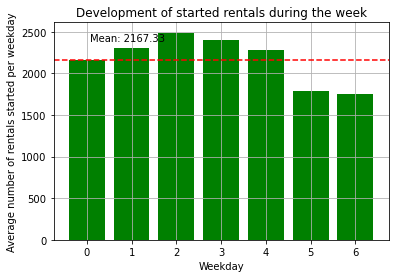

In [21]:
plt.bar(
        df_average_per_weekday["start_time_weekday"], 
        df_average_per_weekday["avg_number_started_rentals"], 
        color="green"
)
plt.axhline(mean, color="r", linestyle="--")
plt.xlabel("Weekday")
plt.ylabel("Average number of rentals started per weekday")
plt.title("Development of started rentals during the week")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

#### Analysis and Interpretation of Results:

The Bike rental demand is the lowest at the weekends (Saturdays and Sundays). The demand these days is significantly below average. The demand on Mondays is slightly below the average. We have a peak demand on Wednesdays. This development can possibly be rooted in the fact that most people don't work/ go to school or university on the weekends. This could mean that a big share of people who use the bike rental service are people who are on their way to work, school, or university.

### Analysis of Rental during the Year

First count the started rentals for each month of the year for the whole dataset and vizualize it in a histogram.
Average values can not be calculated since we only have data of one year.

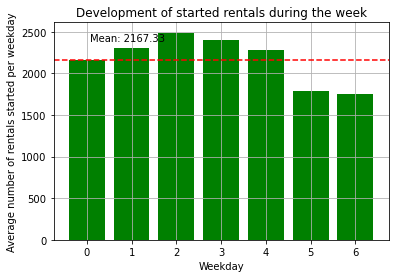

In [24]:
plt.bar(
        df_average_per_weekday["start_time_weekday"], 
        df_average_per_weekday["avg_number_started_rentals"], 
        color="green"
)
plt.axhline(mean, color="r", linestyle="--")
plt.xlabel("Weekday")
plt.ylabel("Average number of rentals started per weekday")
plt.title("Development of started rentals during the week")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

In [25]:
df.groupby(["start_time_month"])["start_time_month"].count().reset_index(name="n_of_retals_in_month")

,start_time_month,n_of_retals_in_month
0,1,31194
1,2,39557
2,3,37021
3,4,66158
4,5,69653
5,6,84630
6,7,91138
7,8,94552
8,9,91095
9,10,88092


In [23]:
mean = df.groupby(["start_time_month"])["start_time_month"].count().mean()
mean

65742.25

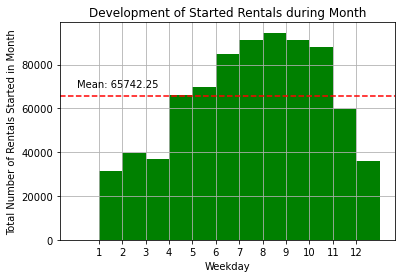

In [24]:
plt.hist(df["start_time_month"], bins=range(0,14,1), color="green")
plt.axhline(mean, color="r", linestyle="--")
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rentals Started in Month")
plt.title("Development of Started Rentals during Month")
plt.xticks(range(1,13,1))
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*(1.06), "Mean: {:.2f}".format(mean))
plt.grid(True)
plt.show()

In [27]:
df_weather = pd.read_csv("data/weather_hourly_philadelphia.csv")

df_weather["date_time"] = pd.to_datetime(df_weather["date_time"])
df_weather["date"] = df_weather["date_time"].dt.date
df_weather["hour"] = df_weather["date_time"].dt.hour
df_merge = pd.merge(df, df_weather, how="left", left_on=["start_time_date", "start_time_hour"], right_on=["date", "hour"])
df_merge["avg_temp"] = df_merge[["max_temp", "min_temp"]].mean(axis="columns")

In [28]:
df_temp_month = df_merge.groupby("start_time_month")["avg_temp"].mean().reset_index(name="avg_temp")
df_temp_month

,start_time_month,avg_temp
0,1,5.074718
1,2,7.943745
2,3,7.591164
3,4,16.490964
4,5,18.141019
5,6,24.117952
6,7,26.481392
7,8,24.538687
8,9,22.174505
9,10,17.784617


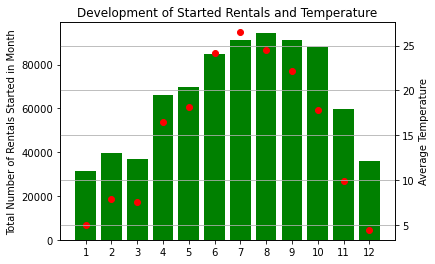

In [30]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df_months = df.groupby(["start_time_month"])["start_time_month"].count().reset_index(name="n_of_retals_in_month")
ax1.bar(df_months["start_time_month"], df_months["n_of_retals_in_month"], color="green")
plt.xlabel("Weekday")
ax1.set_ylabel("Total Number of Rentals Started in Month")
plt.title("Development of Started Rentals and Temperature")
plt.xticks(range(1,13,1))
ax2.scatter(df_temp_month["start_time_month"], df_temp_month["avg_temp"], color="red")
ax2.set_ylabel("Average Temperature")
plt.grid(True)
plt.show()

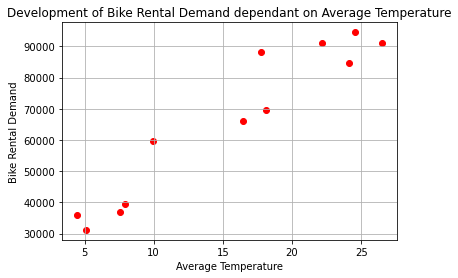

In [31]:
plt.scatter(df_temp_month["avg_temp"], df_months["n_of_retals_in_month"], color="red")
plt.xlabel("Average Temperature")
plt.ylabel("Bike Rental Demand")
plt.title("Development of Bike Rental Demand dependant on Average Temperature")
plt.grid(True)
plt.show()

#### Analysis and Interpretation of the Results:

The development of bike rental demand has similar development as the development of the average temperature during the year. 
The only difference can be seen at the peak. The average temperature has its peak in July whereas the bike rental demand has its peak in August. However, the difference in the bike rental demand in July and August is not that high. Another effect that could have an influence on the bike rental demand is the number of tourists. According to the annual report of Philadelphia, the number of tourists was the highest for the second and third quarters of the year (April to September). In these months the bike rental demand was always very close (April) or above the overall average of the bike rental demand. 
Especially for the month of December, January, February, and March the bike rental demand is clearly below the average.

Development of the tourist numbers according to the annual report: 
- Q1: 7 million
- Q2: 13.1 million
- Q3: 13.1 million
- Q4: 10.1 million

#### KPIs

In [33]:
df["duration_of_use"] = df["end_time"] - df["start_time"]
df_duration_monthly = df.groupby("start_time_month")["duration_of_use"].sum().reset_index(name="sum_duration_bike_rentals")
df_duration_monthly["duration_in_hours"] = df_duration_monthly["sum_duration_bike_rentals"].dt.total_seconds().divide(60*60)
df_duration_monthly["duration_in_minutes"] = df_duration_monthly["sum_duration_bike_rentals"].dt.total_seconds().divide(60)
df_duration_monthly["number_of_rentals"] = df.groupby("start_time_month")["start_time_month"].count().reset_index(drop=True)
df_duration_monthly["avg_duration_per_rental_in_min"] = df_duration_monthly["duration_in_minutes"] / df_duration_monthly["number_of_rentals"]

KeyError: 'Column not found: duration_of_use'

In [34]:
df_duration_monthly

,start_time_month,sum_duration_bike_rentals,duration_in_hours,duration_in_minutes,number_of_rentals,avg_duration_per_rental_in_min
0,1,423 days 23:59:00,10175.983333,610559.0,31194,19.572963
1,2,591 days 05:01:00,14189.016667,851341.0,39557,21.521880
2,3,534 days 00:11:00,12816.183333,768971.0,37021,20.771211
3,4,1039 days 08:26:00,24944.433333,1496666.0,66158,22.622600
4,5,1064 days 12:41:00,25548.683333,1532921.0,69653,22.007968
5,6,1336 days 18:29:00,32082.483333,1924949.0,84630,22.745469
6,7,1463 days 15:43:00,35127.716667,2107663.0,91138,23.126062
7,8,1413 days 12:27:00,33924.450000,2035467.0,94552,21.527488
8,9,1387 days 09:35:00,33297.583333,1997855.0,91095,21.931555
9,10,1257 days 08:11:00,30176.183333,1810571.0,88092,20.553183


In [35]:
plt.bar(df_duration_monthly["start_time_month"],
       df_duration_monthly["avg_duration_per_rental_in_min"],
       color="green")
plt.grid(True)
plt.xticks(range(1,13,1))
plt.xlabel("Months")
plt.ylabel("Avg Duration per Rental in min")
plt.show()

In [36]:
plt.bar(df_duration_monthly["start_time_month"],
       df_duration_monthly["duration_in_hours"],
       color="green")
plt.grid(True)
plt.xticks(range(1,13,1))
plt.xlabel("Months")
plt.ylabel("Summed Rental durations in Hours")
plt.show()

In [37]:
df.user_type.unique()

array(['Indego30', 'Walk-up', 'IndegoFlex', 'One Day Pass',
       'Two Day Pass', 'Indego365'], dtype=object)

In [ ]:
df.columns

Other KPIs: 
Share of long time customers -> Indego365
Revenue -> fehlende preise
Fleet utilization (Auslastung) -> Don't know the total number of bikes

## Bike fleet utilization

In [38]:
# approximate how many individual bikes there are (we have no information about total number of bikes)
number_of_bikes = len(df["bike_id"].unique())
total_number_of_rentals = len(df) # each row is a rental process
print(f"{number_of_bikes=}, {total_number_of_rentals=}")

number_of_bikes=1250, total_number_of_rentals=788907


In [39]:
# calculate total number of rides for each bike over the whole year
df_bike_ride_count = df.groupby("bike_id")["start_time"].count().reset_index(name="total_number_of_rides").sort_values(by="total_number_of_rides", ascending=False).reset_index(drop=True)
df_bike_ride_count["cumulative_ride_count"] = df_bike_ride_count["total_number_of_rides"].cumsum()
df_bike_ride_count["percentage_number_of_bikes"] = df_bike_ride_count.index.to_series().add(1).divide(number_of_bikes)
df_bike_ride_count["percentage_ride_count"] = df_bike_ride_count["cumulative_ride_count"].divide(total_number_of_rentals)
df_bike_ride_count

,bike_id,total_number_of_rides,cumulative_ride_count,percentage_number_of_bikes,percentage_ride_count
0,11171,1370,1370,0.0008,0.001737
1,11010,1031,2401,0.0016,0.003043
2,5351,1027,3428,0.0024,0.004345
3,5182,1025,4453,0.0032,0.005645
4,5167,1024,5477,0.0040,0.006943
...,...,...,...,...,...
1245,11045,35,788881,0.9968,0.999967
1246,11829,10,788891,0.9976,0.999980
1247,11825,8,788899,0.9984,0.999990
1248,11003,7,788906,0.9992,0.999999


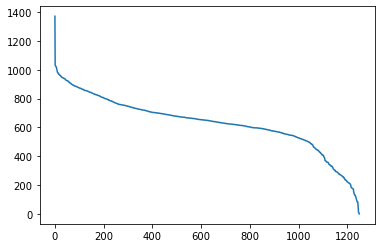

In [40]:
plt.plot(df_bike_ride_count.index.to_series(), df_bike_ride_count["total_number_of_rides"])

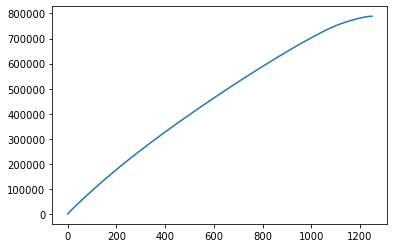

In [41]:
plt.plot(df_bike_ride_count.index.to_series(), df_bike_ride_count["cumulative_ride_count"])

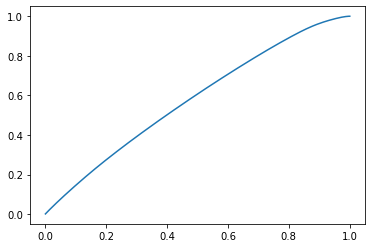

In [42]:
plt.plot(df_bike_ride_count["percentage_number_of_bikes"], df_bike_ride_count["percentage_ride_count"])

In [43]:
# utilization by month
df_util_month = df.groupby("start_time_month")["bike_id"].nunique().reset_index(name="number_of_bikes_used")
df_util_month["utilization"] = df_util_month["number_of_bikes_used"].divide(number_of_bikes)
df_util_month

,start_time_month,number_of_bikes_used,utilization
0,1,939,0.7512
1,2,958,0.7664
2,3,952,0.7616
3,4,963,0.7704
4,5,1044,0.8352
5,6,1109,0.8872
6,7,1104,0.8832
7,8,1151,0.9208
8,9,1196,0.9568
9,10,1184,0.9472


<BarContainer object of 12 artists>

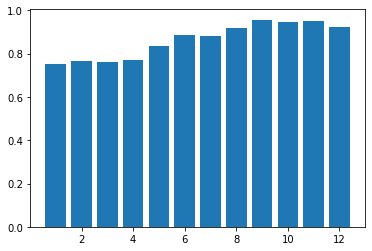

In [44]:
plt.bar(df_util_month["start_time_month"], df_util_month["utilization"])

In [45]:
set(df[df["start_time_month"]==5]["bike_id"].unique()) - set(df[df["start_time_month"]==4]["bike_id"].unique())

{0,
 5125,
 5196,
 6701,
 11014,
 11706,
 11708,
 11714,
 11718,
 11719,
 11720,
 11723,
 11725,
 11728,
 11731,
 11736,
 11740,
 11742,
 11743,
 11752,
 11754,
 11755,
 11756,
 11757,
 11759,
 11762,
 11764,
 11766,
 11768,
 11770,
 11771,
 11772,
 11773,
 11776,
 11778,
 11784,
 11795,
 11797,
 11798,
 11804,
 11805,
 11806,
 11807,
 11811,
 11823,
 11828,
 11829,
 11830,
 11832,
 11834,
 11835,
 11837,
 11843,
 11845,
 11853,
 11855,
 11861,
 11869,
 11874,
 11878,
 11883,
 11885,
 11886,
 11892,
 11893,
 11901,
 11903,
 11904,
 11906,
 11907,
 11910,
 11914,
 11921,
 11923,
 11926,
 11929,
 11930,
 11931,
 11932,
 11942,
 11946,
 11951,
 11952,
 11953,
 11954,
 11955,
 11960}

In [46]:
for i in range(1,5):
    print((df[df["start_time_month"]==i]["bike_id"] > 11700).any())

False
False
False
False


In [61]:
# hourly values
df_bike_count_hourly = df.groupby(["start_time_date", "start_time_hour"])["bike_id"].nunique().reset_index(name="number_of_bikes")
df_bike_count_hourly["start_time_date_hour"] = df_bike_count_hourly["start_time_date"].astype(str) +"x"+  df_bike_count_hourly["start_time_hour"].astype(str)
df_bike_count_hourly

,start_time_date,start_time_hour,number_of_bikes,start_time_date_hour
0,2017-01-01,0,21,2017-01-01x0
1,2017-01-01,1,24,2017-01-01x1
2,2017-01-01,2,16,2017-01-01x2
3,2017-01-01,3,5,2017-01-01x3
4,2017-01-01,4,4,2017-01-01x4
...,...,...,...,...
8663,2017-12-31,19,12,2017-12-31x19
8664,2017-12-31,20,4,2017-12-31x20
8665,2017-12-31,21,7,2017-12-31x21
8666,2017-12-31,22,10,2017-12-31x22


In [48]:
# dayly values
df_bike_count_daily = df.groupby(["start_time_date"])["bike_id"].nunique().reset_index(name="number_of_bikes")
df_bike_count_daily

,start_time_date,number_of_bikes
0,2017-01-01,457
1,2017-01-02,198
2,2017-01-03,365
3,2017-01-04,566
4,2017-01-05,478
...,...,...
360,2017-12-27,368
361,2017-12-28,351
362,2017-12-29,341
363,2017-12-30,133


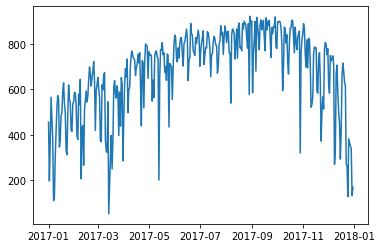

In [49]:
plt.plot(df_bike_count_daily["start_time_date"], df_bike_count_daily["number_of_bikes"])

In [54]:
# weekly values
df_bike_count_weekly = df.groupby("start_time_week")["bike_id"].nunique().reset_index(name="number_of_bikes")

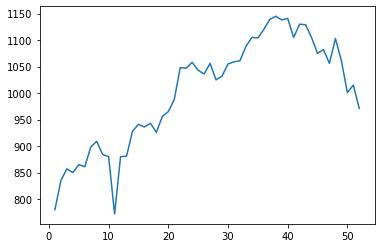

In [55]:
plt.plot(df_bike_count_weekly["start_time_week"], df_bike_count_weekly["number_of_bikes"])